# Discussion 01:  FIFA Analytics

For more info about the data items, you may take a look at: https://sofifa.com/

From marketing, business, and sports management perspectives, this dataset can be highly valuable. Numerous research questions can be generated. For example:

* Sports tech service firms may be interested in analyzing the players' traits and then customize their services.
* Clubs may want to know if their players' characteristics are significantly different than some other major "competitors".
* Sports analysts may want to investigate if certain countries have significantly unbalanced player types.
* Owners of the clubs want to know what type of players may be more associated with performance and club rating and therefore the clubs may adjust their plan to recruit future players.
* International sports product firms may analyze players' patterns and traits across countries and therefore adjust their international marketing focuses and strategies.
* Clubs may want to probe if there are excessive gaps between players' wage and value and therefore the clubs may adjust future assets allocation.
* Firms such as NIKE may be interested in mapping out the players' skills and design its different product lines.
Coaches may want to know different skill sets across players from different countries, different age groups, and other categories.
* Many more.....
We use this dataset to refresh your knowledge about R (or any analysis tool you prefer) and basic data analysis.

Please try to complete following tasks and generate insights from your analysis.

You will:

* Observe and examine the data structure.
* Visually display the descriptive statistics of the variables you are interested in.
* Choose appropriate data analysis methods and examine the relationships between or among the variables that interest you. (I encourage you to use multiple methods or approaches to explore the data.)
Based on your analysis, please generate some insights.

## I. Load the Environment

In [170]:
# Import standard libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [171]:
# Load / inspect the data
fifa = pd.read_csv("data/Fifa_Dataset.csv", parse_dates=["birth_date", "club_join_date"])
fifa.head(10)

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
5,203376,V. van Dijk,Virgil van Dijk,1991-07-08,27,193.04,92.1,CB,Netherlands,88,...,78+3,82+3,82+3,82+3,78+3,80+3,86+3,86+3,86+3,80+3
6,231747,K. Mbappé,Kylian Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
7,153079,S. Agüero,Sergio Leonel Agüero del Castillo,1988-06-02,30,172.72,69.9,ST,Argentina,89,...,58+3,56+3,56+3,56+3,58+3,53+3,47+3,47+3,47+3,53+3
8,167495,M. Neuer,Manuel Neuer,1986-03-27,32,193.04,92.1,GK,Germany,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,179813,E. Cavani,Edinson Roberto Cavani Gómez,1987-02-14,32,185.42,77.1,ST,Uruguay,89,...,67+3,65+3,65+3,65+3,67+3,65+3,63+3,63+3,63+3,65+3


In [172]:
# Check data structure
print(fifa.shape, "\n")

fifa.info()

(17954, 92) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id                             17954 non-null  int64         
 1   name                           17954 non-null  object        
 2   full_name                      17954 non-null  object        
 3   birth_date                     17954 non-null  datetime64[ns]
 4   age                            17954 non-null  int64         
 5   height_cm                      17954 non-null  float64       
 6   weight_kgs                     17954 non-null  float64       
 7   positions                      17954 non-null  object        
 8   nationality                    17954 non-null  object        
 9   overall_rating                 17954 non-null  int64         
 10  potential                      17954 non-null  int64         
 11  v

## II. EDA

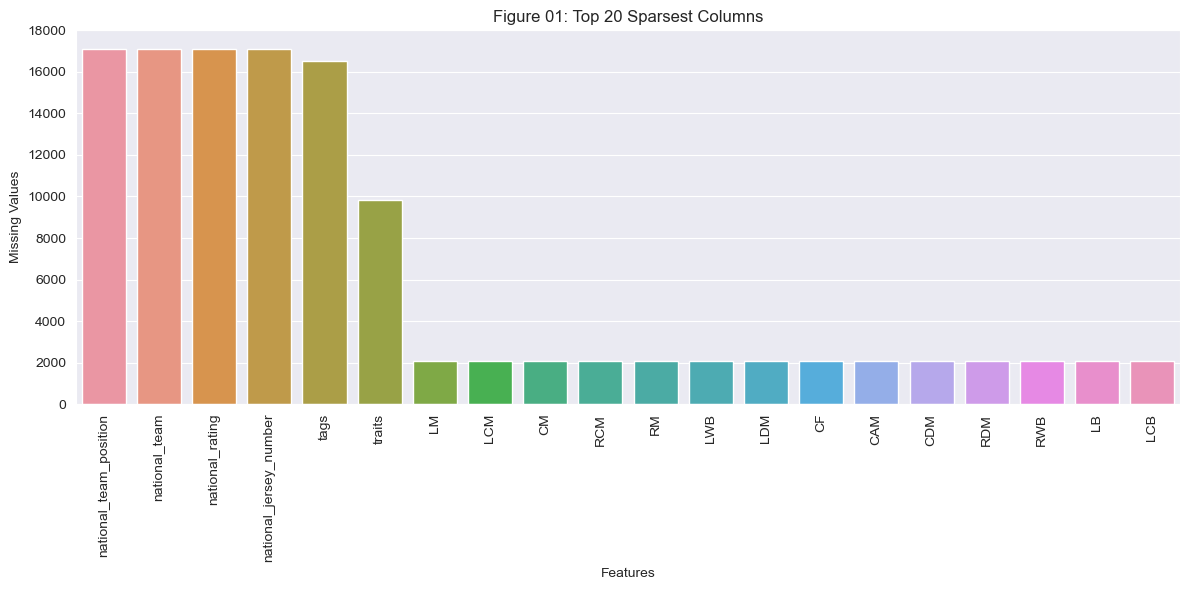

In [173]:
# Count missing values by column, excluding full features, and sort by the number of missing entries
missing_all = (
    fifa.isna().sum()
        .reset_index()
        .rename(columns={0: "cnt_na_vals"})
        .query("cnt_na_vals != 0")
        .sort_values(by="cnt_na_vals", ascending=False)
        .reset_index(drop=True)
)

# Visualize the 20 least-populated features
twenty_sparsest = missing_all.head(20)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=twenty_sparsest, x="index", y="cnt_na_vals", ax=ax)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylim(0, 18000)
plt.ylabel("Missing Values")
plt.title("Figure 01: Top 20 Sparsest Columns")

plt.tight_layout()
plt.show()

So, from the above, I can see that ```national_team```, ```national_team_position```, ```national_jersey_number```, and ```national_rating``` are all 90% sparse. This makes sense, since  only a handful of elites would be chosen to play for the national team. However, it means that in the case of any Machine Learning, these features would have to be dropped from consideration. Lets subset those populated national entries for later analysis, then move on.

```tags``` and ```traits``` would also likely require consideration, given their sparsity.

In [174]:
# Subset players with National Records.
national = fifa.loc[:, ["id", "national_team", "national_team_position", "national_jersey_number", "national_rating"]].dropna()
national_subset = fifa.loc[fifa["id"].isin(national["id"])]

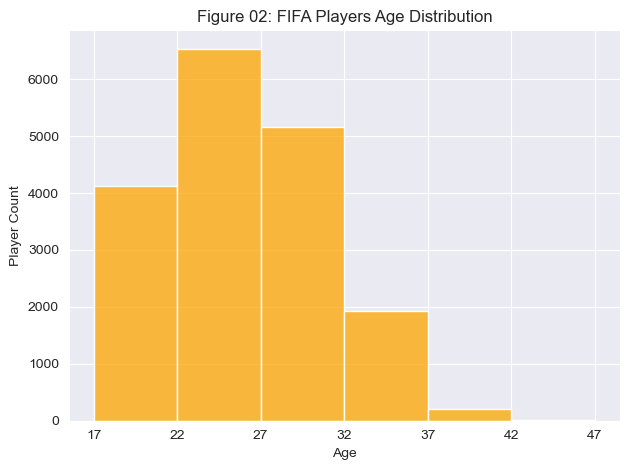

In [175]:
# Visualize age distribution
sns.histplot(data=fifa, x="age",
             binwidth=5,
             bins=range(17, 51, 5),
             color="orange")
plt.xticks(range(17, 52, 5))
plt.xlabel("Age")
plt.ylabel("Player Count")
plt.title("Figure 02: FIFA Players Age Distribution")

plt.tight_layout()
plt.show()

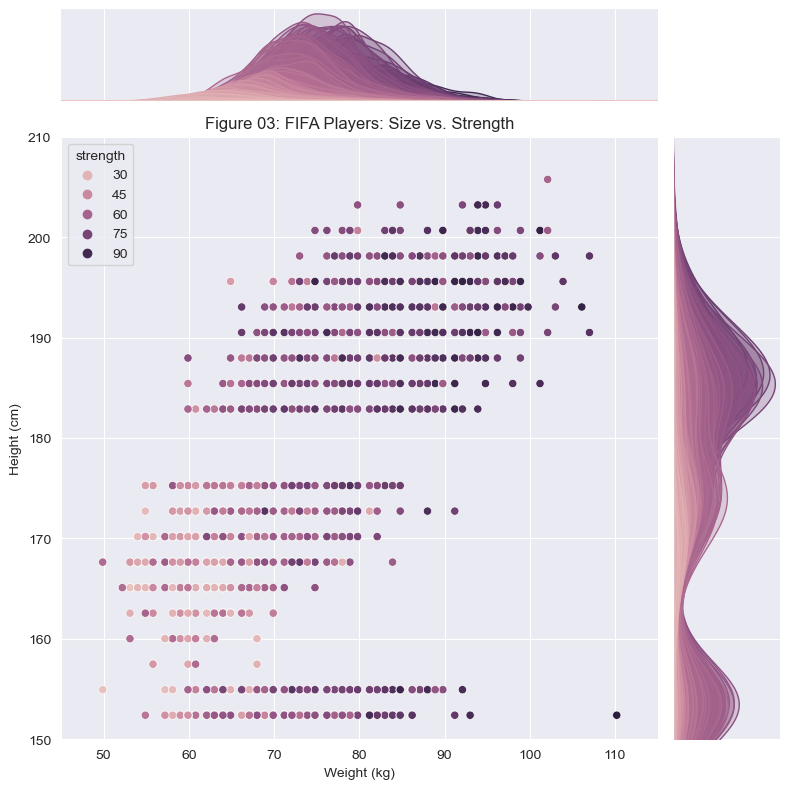

In [176]:
# Examine physical features: height, weight, and strength
sns.jointplot(data=fifa,
              x="weight_kgs",
              y="height_cm",
              hue="strength",
              palette=sns.cubehelix_palette(as_cmap=True),
              height=8)

plt.xlim(45, 115)
plt.ylim(150, 210)
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Figure 03: FIFA Players: Size vs. Strength")

plt.tight_layout()
plt.show()

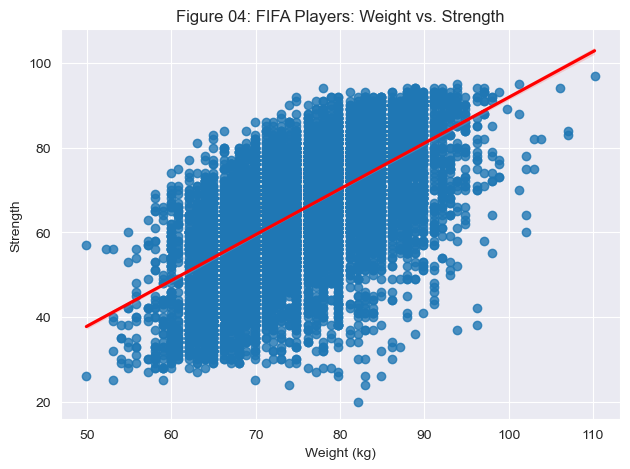

In [177]:
# Check weight vs. strength
sns.regplot(data=fifa,
            x="weight_kgs",
            y="strength",
            marker="o",
            line_kws=dict(color="red"))

plt.xlabel("Weight (kg)")
plt.ylabel("Strength")
plt.title("Figure 04: FIFA Players: Weight vs. Strength")

plt.tight_layout()
plt.show()

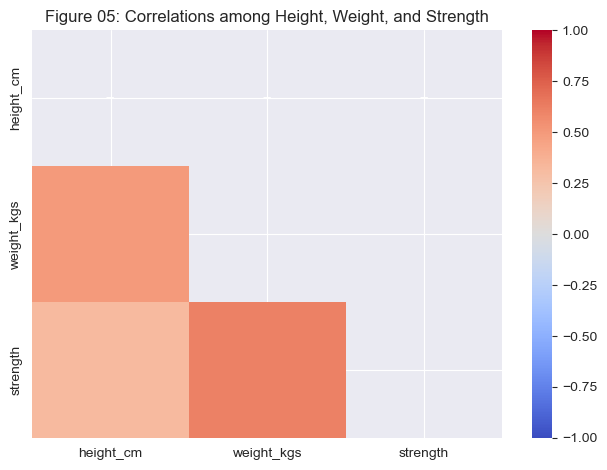

In [178]:
# Subset Correlation
physical_corr = fifa.loc[:, ["height_cm", "weight_kgs", "strength"]].corr()
mask = np.triu(np.ones_like(physical_corr, dtype=bool))
sns.heatmap(data=physical_corr, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", mask=mask)
plt.title("Figure 05: Correlations among Height, Weight, and Strength")
plt.tight_layout()
plt.show()

While ```height_cm``` and ```weight_kgs``` have a mild positive correlation with one another, ```strength``` is almost twice as correlated to ```weight_kgs``` ($r \approx 0.61$) as it is to ```height_cm```.

## III. Data Engineering

In [179]:
# Initialize df, our "clean" df, using non-sparse columns from FIFA
full_cols = sorted(list(set(fifa.columns.tolist()) - set(missing_all["index"].tolist())))
df = fifa.loc[:, full_cols]

# Reduce integers to a 32-bit format
for col in df.select_dtypes(include="int64"):
    df[col] = df[col].astype("int32")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   GK_diving                      17954 non-null  int32         
 1   GK_handling                    17954 non-null  int32         
 2   GK_kicking                     17954 non-null  int32         
 3   GK_positioning                 17954 non-null  int32         
 4   GK_reflexes                    17954 non-null  int32         
 5   acceleration                   17954 non-null  int32         
 6   age                            17954 non-null  int32         
 7   aggression                     17954 non-null  int32         
 8   agility                        17954 non-null  int32         
 9   balance                        17954 non-null  int32         
 10  ball_control                   17954 non-null  int32         
 11  birth_date     

In [180]:
# Sus out columns that are missing less than or equal to 15% of their entries.
temp = missing_all["cnt_na_vals"] <= 0.15 * fifa.shape[0]
cleaning_window = fifa.loc[:,
                  missing_all.loc[temp].reset_index(drop=True)[
                      "index"].values.tolist()]
cleaning_window.head(10)

,LM,LCM,CM,RCM,RM,LWB,LDM,CF,CAM,CDM,...,RF,club_join_date,release_clause_euro,contract_end_year,value_euro,wage_euro,club_jersey_number,club_position,club_rating,club_team
0,91+2,85+2,85+2,85+2,91+2,64+2,61+2,93+2,93+2,61+2,...,93+2,2004-07-01,226500000.0,2021,110500000.0,565000.0,10.0,RW,86.0,FC Barcelona
1,86+3,85+3,85+3,85+3,86+3,71+3,71+3,84+3,86+3,71+3,...,84+3,2013-08-30,133800000.0,2020,69500000.0,205000.0,23.0,LCM,83.0,Tottenham Hotspur
2,83+3,84+3,84+3,84+3,83+3,76+3,77+3,83+3,84+3,77+3,...,83+3,2016-08-09,144200000.0,2021,73000000.0,255000.0,6.0,LCM,82.0,Manchester United
3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,85+3,86+3,58+3,...,85+3,2010-07-01,105400000.0,2022,62000000.0,165000.0,24.0,LS,82.0,Napoli
4,57+3,61+3,61+3,61+3,57+3,73+3,77+3,54+3,55+3,77+3,...,54+3,2014-07-01,106500000.0,2021,60000000.0,135000.0,26.0,LCB,82.0,Napoli
5,68+3,73+3,73+3,73+3,68+3,78+3,82+3,67+3,68+3,82+3,...,67+3,2018-01-01,114500000.0,2023,59500000.0,215000.0,4.0,LCB,83.0,Liverpool
6,86+3,78+3,78+3,78+3,86+3,66+3,62+3,87+3,86+3,62+3,...,87+3,2018-07-01,166100000.0,2022,81000000.0,100000.0,7.0,LS,84.0,Paris Saint-Germain
7,83+3,76+3,76+3,76+3,83+3,58+3,56+3,87+3,85+3,56+3,...,87+3,2011-07-28,119300000.0,2021,64500000.0,300000.0,10.0,ST,85.0,Manchester City
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2011-07-01,62700000.0,2021,38000000.0,130000.0,1.0,GK,85.0,FC Bayern München
9,79+3,75+3,75+3,75+3,79+3,67+3,65+3,83+3,80+3,65+3,...,83+3,2013-07-16,111000000.0,2020,60000000.0,200000.0,9.0,RS,84.0,Paris Saint-Germain


In [181]:
cleaning_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   LM                   15889 non-null  object        
 1   LCM                  15889 non-null  object        
 2   CM                   15889 non-null  object        
 3   RCM                  15889 non-null  object        
 4   RM                   15889 non-null  object        
 5   LWB                  15889 non-null  object        
 6   LDM                  15889 non-null  object        
 7   CF                   15889 non-null  object        
 8   CAM                  15889 non-null  object        
 9   CDM                  15889 non-null  object        
 10  RDM                  15889 non-null  object        
 11  RWB                  15889 non-null  object        
 12  LB                   15889 non-null  object        
 13  LCB                  15889 non-

In [182]:
def calc_from_str(inString):
    """Calculate a sum from a string"""
    val = 0
    if inString.strip().lower() == "nan":
        val = np.nan
    elif "+" in inString:
        a, b = inString.strip().split("+")
        val = int(a) + int(b)
    else:
        val = int(inString)
    return val

In [183]:
# Loop through selected variables, applying the transformation to numeric
temp_df = cleaning_window.loc[:, "LM":"RF"]
for col in temp_df.columns.tolist():
    # Perform the calculation
    temp_df[col] = temp_df[col].astype("str").apply(calc_from_str)
# Use simple mean imputation
means_dict = {col:temp_df[col].mean().round(0) for col in temp_df.columns.tolist()}
temp_df = temp_df.fillna(value=means_dict).astype("int32")

# Check work
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LM      17954 non-null  int32
 1   LCM     17954 non-null  int32
 2   CM      17954 non-null  int32
 3   RCM     17954 non-null  int32
 4   RM      17954 non-null  int32
 5   LWB     17954 non-null  int32
 6   LDM     17954 non-null  int32
 7   CF      17954 non-null  int32
 8   CAM     17954 non-null  int32
 9   CDM     17954 non-null  int32
 10  RDM     17954 non-null  int32
 11  RWB     17954 non-null  int32
 12  LB      17954 non-null  int32
 13  LCB     17954 non-null  int32
 14  CB      17954 non-null  int32
 15  RCB     17954 non-null  int32
 16  RAM     17954 non-null  int32
 17  RB      17954 non-null  int32
 18  LAM     17954 non-null  int32
 19  LW      17954 non-null  int32
 20  RW      17954 non-null  int32
 21  ST      17954 non-null  int32
 22  RS      17954 non-null  int32
 23  LS      179

In [184]:
# Push engineered columns to df
df = pd.concat(objs=[df, temp_df], axis=1)

# Remove engineered columns from cleaning_window
cleaning_window = cleaning_window.drop(labels=temp_df.columns.tolist(), axis=1)

# Check what's left
cleaning_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   club_join_date       16018 non-null  datetime64[ns]
 1   release_clause_euro  16117 non-null  float64       
 2   contract_end_year    17593 non-null  object        
 3   value_euro           17699 non-null  float64       
 4   wage_euro            17708 non-null  float64       
 5   club_jersey_number   17940 non-null  float64       
 6   club_position        17940 non-null  object        
 7   club_rating          17940 non-null  float64       
 8   club_team            17940 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.2+ MB


In [185]:
# Use context to determine fill value policies, as appropriate
cleaning_window["club_jersey_number"] = cleaning_window["club_jersey_number"].fillna(value=0).astype("int32")
cleaning_window["club_position"] = cleaning_window["club_position"].fillna(value="Unknown").astype("str")
cleaning_window["club_team"] = cleaning_window["club_team"].fillna(value="Unknown").astype("str")

# Subset engineered columns
temp = ["club_jersey_number", "club_position", "club_team"]
temp_df = cleaning_window.loc[:, temp]

# Push engineered columns to df
df = pd.concat(objs=[df, temp_df], axis=1)

# Remove engineered columns from cleaning_window
cleaning_window = cleaning_window.drop(labels=temp, axis=1)

# Check what's left
cleaning_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   club_join_date       16018 non-null  datetime64[ns]
 1   release_clause_euro  16117 non-null  float64       
 2   contract_end_year    17593 non-null  object        
 3   value_euro           17699 non-null  float64       
 4   wage_euro            17708 non-null  float64       
 5   club_rating          17940 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 841.7+ KB


In [186]:
# Compare to other numeric features to gain insight
temp_df = pd.concat(objs=[df, cleaning_window], axis=1).select_dtypes(exclude=["object", "datetime64[ns]"]).dropna()
temp_corr = temp_df.corr().abs().round(2)

temp_corr["value_euro"].reset_index().sort_values(by="value_euro", ascending=False).head(10)

,index,value_euro
71,value_euro,1.00
70,release_clause_euro,0.99
72,wage_euro,0.86
21,international_reputation(1-5),0.65
26,overall_rating,0.63
29,potential,0.58
30,reactions,0.55
73,club_rating,0.54
45,CM,0.49
44,LCM,0.49


Here, we can see that ```value``` euro is most closely associated with ```release_clause_euro``` and ```wage_euro```. However, ```international_rating(1-5)```, ```overall_rating```, and ```potential``` also have some mild association with ```value```, as well. Let's try using full columns to predict individual observations in the feature space of ```cleaning_window```. Scikit-learn's experimental ```IterativeImputer``` object utilizes Bayesian Ridge Regression to iteratively impute missing numerical values from all others.

In [187]:
# Join predictive and sparse variables in imputable_df
pred_df = df.loc[:, ["international_reputation(1-5)", "overall_rating", "potential"]]
imputable_df = pd.concat(objs=[cleaning_window, pred_df], axis=1).drop(labels=["club_join_date", "contract_end_year"], axis=1)
imputable_df

,release_clause_euro,value_euro,wage_euro,club_rating,international_reputation(1-5),overall_rating,potential
0,226500000.0,110500000.0,565000.0,86.0,5,94,94
1,133800000.0,69500000.0,205000.0,83.0,3,88,89
2,144200000.0,73000000.0,255000.0,82.0,4,88,91
3,105400000.0,62000000.0,165000.0,82.0,3,88,88
4,106500000.0,60000000.0,135000.0,82.0,3,88,91
...,...,...,...,...,...,...,...
17949,1800000.0,975000.0,3000.0,67.0,1,67,70
17950,295000.0,190000.0,1000.0,65.0,1,59,67
17951,289000.0,170000.0,1000.0,69.0,1,59,67
17952,532000.0,280000.0,4000.0,74.0,1,59,71


In [188]:
# Save pre-image of feature statistics for later validation
pre_impute_stats = imputable_df.iloc[:, :4].describe()

# Impute iteratively
imputer = IterativeImputer(random_state=2025)
imputed_data = imputer.fit_transform(imputable_df)

# Convert back to DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=imputable_df.columns)

imputed_df

,release_clause_euro,value_euro,wage_euro,club_rating,international_reputation(1-5),overall_rating,potential
0,226500000.0,110500000.0,565000.0,86.0,5.0,94.0,94.0
1,133800000.0,69500000.0,205000.0,83.0,3.0,88.0,89.0
2,144200000.0,73000000.0,255000.0,82.0,4.0,88.0,91.0
3,105400000.0,62000000.0,165000.0,82.0,3.0,88.0,88.0
4,106500000.0,60000000.0,135000.0,82.0,3.0,88.0,91.0
...,...,...,...,...,...,...,...
17949,1800000.0,975000.0,3000.0,67.0,1.0,67.0,70.0
17950,295000.0,190000.0,1000.0,65.0,1.0,59.0,67.0
17951,289000.0,170000.0,1000.0,69.0,1.0,59.0,67.0
17952,532000.0,280000.0,4000.0,74.0,1.0,59.0,71.0


In [189]:
# Save post-image feature statistics
post_impute_stats = imputed_df.iloc[:, :4].describe()

# Examine the relative change resulting from iterative imputation
rel_change_stats = ((post_impute_stats - pre_impute_stats) / pre_impute_stats).abs().round(2).iloc[1:, :]
rel_change_stats

,release_clause_euro,value_euro,wage_euro,club_rating
mean,0.01,0.00,0.00,0.0
std,0.03,0.01,0.01,0.0
min,3.30,0.00,0.00,0.0
25%,0.06,0.00,0.00,0.0
50%,0.02,0.04,0.00,0.0
75%,0.14,0.10,0.10,0.0
max,0.00,0.00,0.00,0.0


While there is a significant increase in the minimum release clause, relative changes to the remaining variables are somewhat minimal.

In [190]:
# Push engineered columns to df
temp = rel_change_stats.columns.tolist()
temp_df = imputed_df.loc[:, temp]
df = pd.concat(objs=[df, temp_df], axis=1)

# Remove engineered columns from cleaning_window
cleaning_window = cleaning_window.drop(labels=temp, axis=1)

# Check what's left
cleaning_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   club_join_date     16018 non-null  datetime64[ns]
 1   contract_end_year  17593 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 280.7+ KB


In [191]:
cleaning_window["contract_end_year"].unique()

array(['2021', '2020', '2022', '2023', '2024', 'Jun 30, 2019', '2025',
       nan, '2019', 'May 31, 2020', 'Jun 30, 2020', 'Dec 31, 2019',
       'May 31, 2019', 'Jan 1, 2020', 'May 21, 2019', 'Jan 31, 2020',
       'Feb 27, 2020', 'Dec 1, 2019', 'Oct 14, 2019', 'Dec 31, 2018',
       'Mar 1, 2019', 'Jun 1, 2020', 'Jul 2, 2019', 'Dec 1, 2020', '2026'],
      dtype=object)

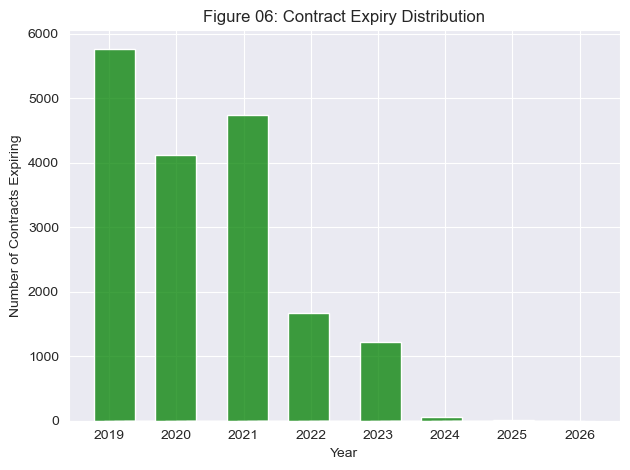

In [192]:
# Force entry conformity
end_year_dict = {
    '2021': 2021,
    '2020': 2020,
    '2022': 2022,
    '2023': 2023,
    '2024': 2024,
    'Jun 30, 2019': 2019,
    '2025': 2025,
    'nan': np.nan,
    '2019': 2019,
    'May 31, 2020': 2020,
    'Jun 30, 2020': 2020,
    'Dec 31, 2019': 2020,
    'May 31, 2019': 2019,
    'Jan 1, 2020': 2020,
    'May 21, 2019': 2019,
    'Jan 31, 2020': 2020,
    'Feb 27, 2020': 2020,
    'Dec 1, 2019': 2019,
    'Oct 14, 2019': 2019,
    'Dec 31, 2018': 2019,
    'Mar 1, 2019': 2019,
    'Jun 1, 2020': 2020,
    'Jul 2, 2019': 2019,
    'Dec 1, 2020': 2020,
    '2026': 2026
}
cleaning_window["contract_end_year"] = cleaning_window["contract_end_year"].map(end_year_dict)

# Visualize contracts
sns.histplot(data=cleaning_window, x="contract_end_year", color="green", shrink=4)
plt.xlabel("Year")
plt.ylabel("Number of Contracts Expiring")
plt.title("Figure 06: Contract Expiry Distribution")

plt.tight_layout()
plt.show()

In [193]:
cleaning_window.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   club_join_date     16018 non-null  datetime64[ns]
 1   contract_end_year  17593 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 280.7 KB


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   GK_diving                      17954 non-null  int32         
 1   GK_handling                    17954 non-null  int32         
 2   GK_kicking                     17954 non-null  int32         
 3   GK_positioning                 17954 non-null  int32         
 4   GK_reflexes                    17954 non-null  int32         
 5   acceleration                   17954 non-null  int32         
 6   age                            17954 non-null  int32         
 7   aggression                     17954 non-null  int32         
 8   agility                        17954 non-null  int32         
 9   balance                        17954 non-null  int32         
 10  ball_control                   17954 non-null  int32         
 11  birth_date     

In [195]:
# Coerce datatypes
df["release_clause_euro"] = df["release_clause_euro"].astype("int32")
df["value_euro"] = df["value_euro"].astype("int32")
df["wage_euro"] = df["wage_euro"].astype("int32")

cleaning_window = df.loc[:, ["body_type", "preferred_foot", "work_rate"]]
df = df.drop(labels=cleaning_window.columns.tolist(), axis=1)

def recast_body(x):
    if x in ["Lean", "Normal", "Stocky"]:
        return x.lower()
    else:
        return "other"

body_df = pd.get_dummies(data=cleaning_window["body_type"].apply(lambda x: recast_body(x)), prefix="body")
foot_df = pd.get_dummies(data=cleaning_window["preferred_foot"], drop_first=True, prefix="foot").astype("uint8")

work_rate = cleaning_window["work_rate"].str.split("/ ")
work_rate_atk = work_rate.apply(lambda x: x[0]).map({"Low": 1, "Medium": 2, "High": 3}).astype("uint8")
work_rate_def = work_rate.apply(lambda x: x[1]).map({"Low": 1, "Medium": 2, "High": 3}).astype("uint8")

temp_df = pd.concat(objs=[body_df, foot_df], axis=1)
temp_df["work_rate_atk"] = work_rate_atk
temp_df["work_rate_def"] = work_rate_def

df = pd.concat(objs=[temp_df, df], axis=1)
df.to_csv(path_or_buf="data/FIFA_Clean.csv", index=False)

In [196]:
# Delete temporary variables
del temp
del temp_corr
del imputed_data
del imputed_df
del body_df
del foot_df
del work_rate
del work_rate_atk
del work_rate_def
del temp_df

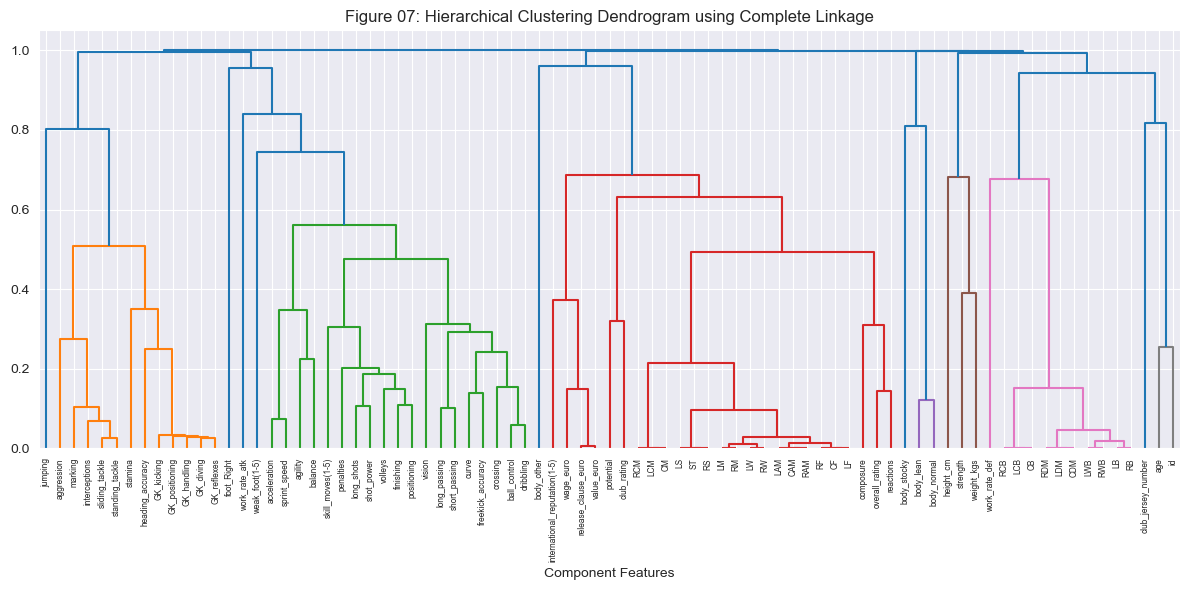

In [197]:
# Subset numerically interpretable columns from df
X = df.select_dtypes(exclude=['datetime64[ns]', 'object'])
# print(f"X Shape: {X.shape}\n")

# Calculate Pearson correlation matrix
corr = X.corr()

# Hierarchical Clustering with Farthest Neighbor method
plt.figure(figsize=(12,6))
dissimilarity = 1 - corr.abs()
Z = linkage(y=squareform(dissimilarity), method='complete')

# Visualize feature hierarchies
dendrogram(Z, labels=X.columns, orientation='top', leaf_rotation=90)
plt.title("Figure 07: Hierarchical Clustering Dendrogram using Complete Linkage")
plt.xlabel("Component Features")

plt.tight_layout()
plt.show()

The above dendrogram is representative of complete-linkage hierarchical clustering. Each color corresponds to a specific cluster. For example, ```agression```, ```marking```, ```interceptions``` are colored orange and grouped with other offensive features, such as ```stamina```, ```GK_kicking```, etc. Meanwhile, monetary features like ```wage_euro``` and rankings like ```international_ratings(1-5)``` eventually join in with traits like ```composure```. While the code snippet originally used a threshold of ```0.8```, we modified this to reflect the psuedo-minimum cluster height. Within our features, the "orange" cluster reaches a height of ```0.5```, so we choose that as our ```threshold``` below.

In [198]:
# Clusterize the data
threshold = 0.5
labels = fcluster(Z, threshold, criterion='distance')

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns; refactored to avoid looping
clustered = X[X.columns[labels_order]]
corr_new = clustered.corr()

# Generate custom text for hover
hover_text = [
    [f"x: {corr_new.columns[j]};<br>y: {corr_new.index[i]};<br>r: {corr_new.iloc[i, j]:.2f}"
     for j in range(corr_new.shape[1])]
    for i in range(corr_new.shape[0])
]

# Create heatmap
fig = go.Figure(data=go.Heatmap(
    z=corr_new.values,
    x=corr_new.columns,
    y=corr_new.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    text=hover_text,
    hoverinfo='text'
))

# Layout adjustments
fig.update_layout(
    title="Correlation Matrix",
    width=1000,
    height=1000
)

# Show interactive plot
fig.show()

## IV. Insights
Utilizing linkage criteria, we reordered our numerical features, and thus our correlation matrix, to position related features closer to one another in terms of their indices. This mimics the functionality of ```method='hclust``` within RLang's ```corrplot``` package. The use of Plotly over Seaborn in this case allows for interactive objects, which also save space since we don't have to specify ```annot``` within ```sns.heatmap```. Instead, we simply hover over the cells to access the details. By examining the above heatmap, we can quickly make a few observations:

* As the "orange" cluster of dendrogram suggested, ```aggression``` is most closely associated with interceptions, tackles, and marking; since r >= 0.72, we can classify these features as having a strong positive correlation with aggression.
* The features ```GK_kicking```, ```GK_reflexes```, and ```GK_handling``` share incredibly strong positive correlations (r=> 0.97). This unusually high association suggests these variables may measure the same underlying quantity.
* Meanwhile, various attacking positions, such as Centre Attacking Middle, Left-Winger, and Center Forward, show a strong positive correlation. While some positions show r = 0.99, others remain highly correlated but distinct. Indeed, this indicates yet again that we may have redundant variables.
* Interestingly, ```stamina``` has strong negative correlations with ```GK_handling```, ```GK_reflexes```, and ```GK_kicking```, among others. Players with high stamina tend to be great at dribbling, ball control, and short passes, but may struggle more with precise movements. One could investigate the difference between endurance-based support players with high stamina and energetic burst players.
* Some features, such as ```jumping```, ```weak_foot```, and ```contract_year_end``` do not seem to be meaningfully associated with many other variables, if at all.

## V. Suggestions: Cluster Analysis and Hypothesis Testing
I would have preferred to progress into unsupervised ML from a more abstract point. In particular, after scaling the data, PCA should allow for reducing features while maintaining variability. This could be used to consider highly correlated features in their more abstract forms. Following PCA, k-means cluster analysis with k = 5 would allow for aggregate comparison and potentially rich storytelling. Additionally, I would be interested in utilizing the national subset aggregates to test hypotheses regarding differences in various performance metrics. Although ```scipy.stats``` has many of these capabilities, the ```pingouin``` package includes more explicit labeling and a neater output.